In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
laptop=pd.read_csv('laptop_data_cleaned.csv')
laptop.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have your dataset in a CSV file
# Replace 'your_dataset.csv' with the path to your dataset file
laptop = pd.read_csv('laptop_data_cleaned.csv')

# Calculate the correlation matrix
correlation_matrix = laptop.corr()

# Create a figure with a specified size
plt.figure(figsize=(10, 10))

# Create a heatmap using seaborn with 'coolwarm' colormap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, square=True, cbar_kws={"shrink": .5})

# Add a title
plt.title('Heat map of the correlation matrix', size=15)

# Add labels for x and y axes
plt.xlabel('Columns', size=12)
plt.ylabel('Columns', size=12)

# Display the plot
plt.show()


ValueError: could not convert string to float: 'Apple'

In [6]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1273 non-null   object 
 1   TypeName     1273 non-null   object 
 2   Ram          1273 non-null   int64  
 3   Weight       1273 non-null   float64
 4   Price        1273 non-null   float64
 5   TouchScreen  1273 non-null   int64  
 6   Ips          1273 non-null   int64  
 7   Ppi          1273 non-null   float64
 8   Cpu_brand    1273 non-null   object 
 9   HDD          1273 non-null   int64  
 10  SSD          1273 non-null   int64  
 11  Gpu_brand    1273 non-null   object 
 12  Os           1273 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 129.4+ KB


In [7]:
laptop.describe()

,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD
count,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000
mean,8.447761,2.041100,10.828218,0.146897,0.279654,146.950812,413.715632,186.252946
std,5.098771,0.669241,0.619565,0.354142,0.449006,42.926775,518.054486,186.531571
min,2.000000,0.690000,9.134616,0.000000,0.000000,90.583402,0.000000,0.000000
25%,4.000000,1.500000,10.387379,0.000000,0.000000,127.335675,0.000000,0.000000
50%,8.000000,2.040000,10.872255,0.000000,0.000000,141.211998,0.000000,256.000000
75%,8.000000,2.310000,11.287447,0.000000,1.000000,157.350512,1000.000000,256.000000
max,64.000000,4.700000,12.691441,1.000000,1.000000,352.465147,2000.000000,1024.000000


c:\anacondaa\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


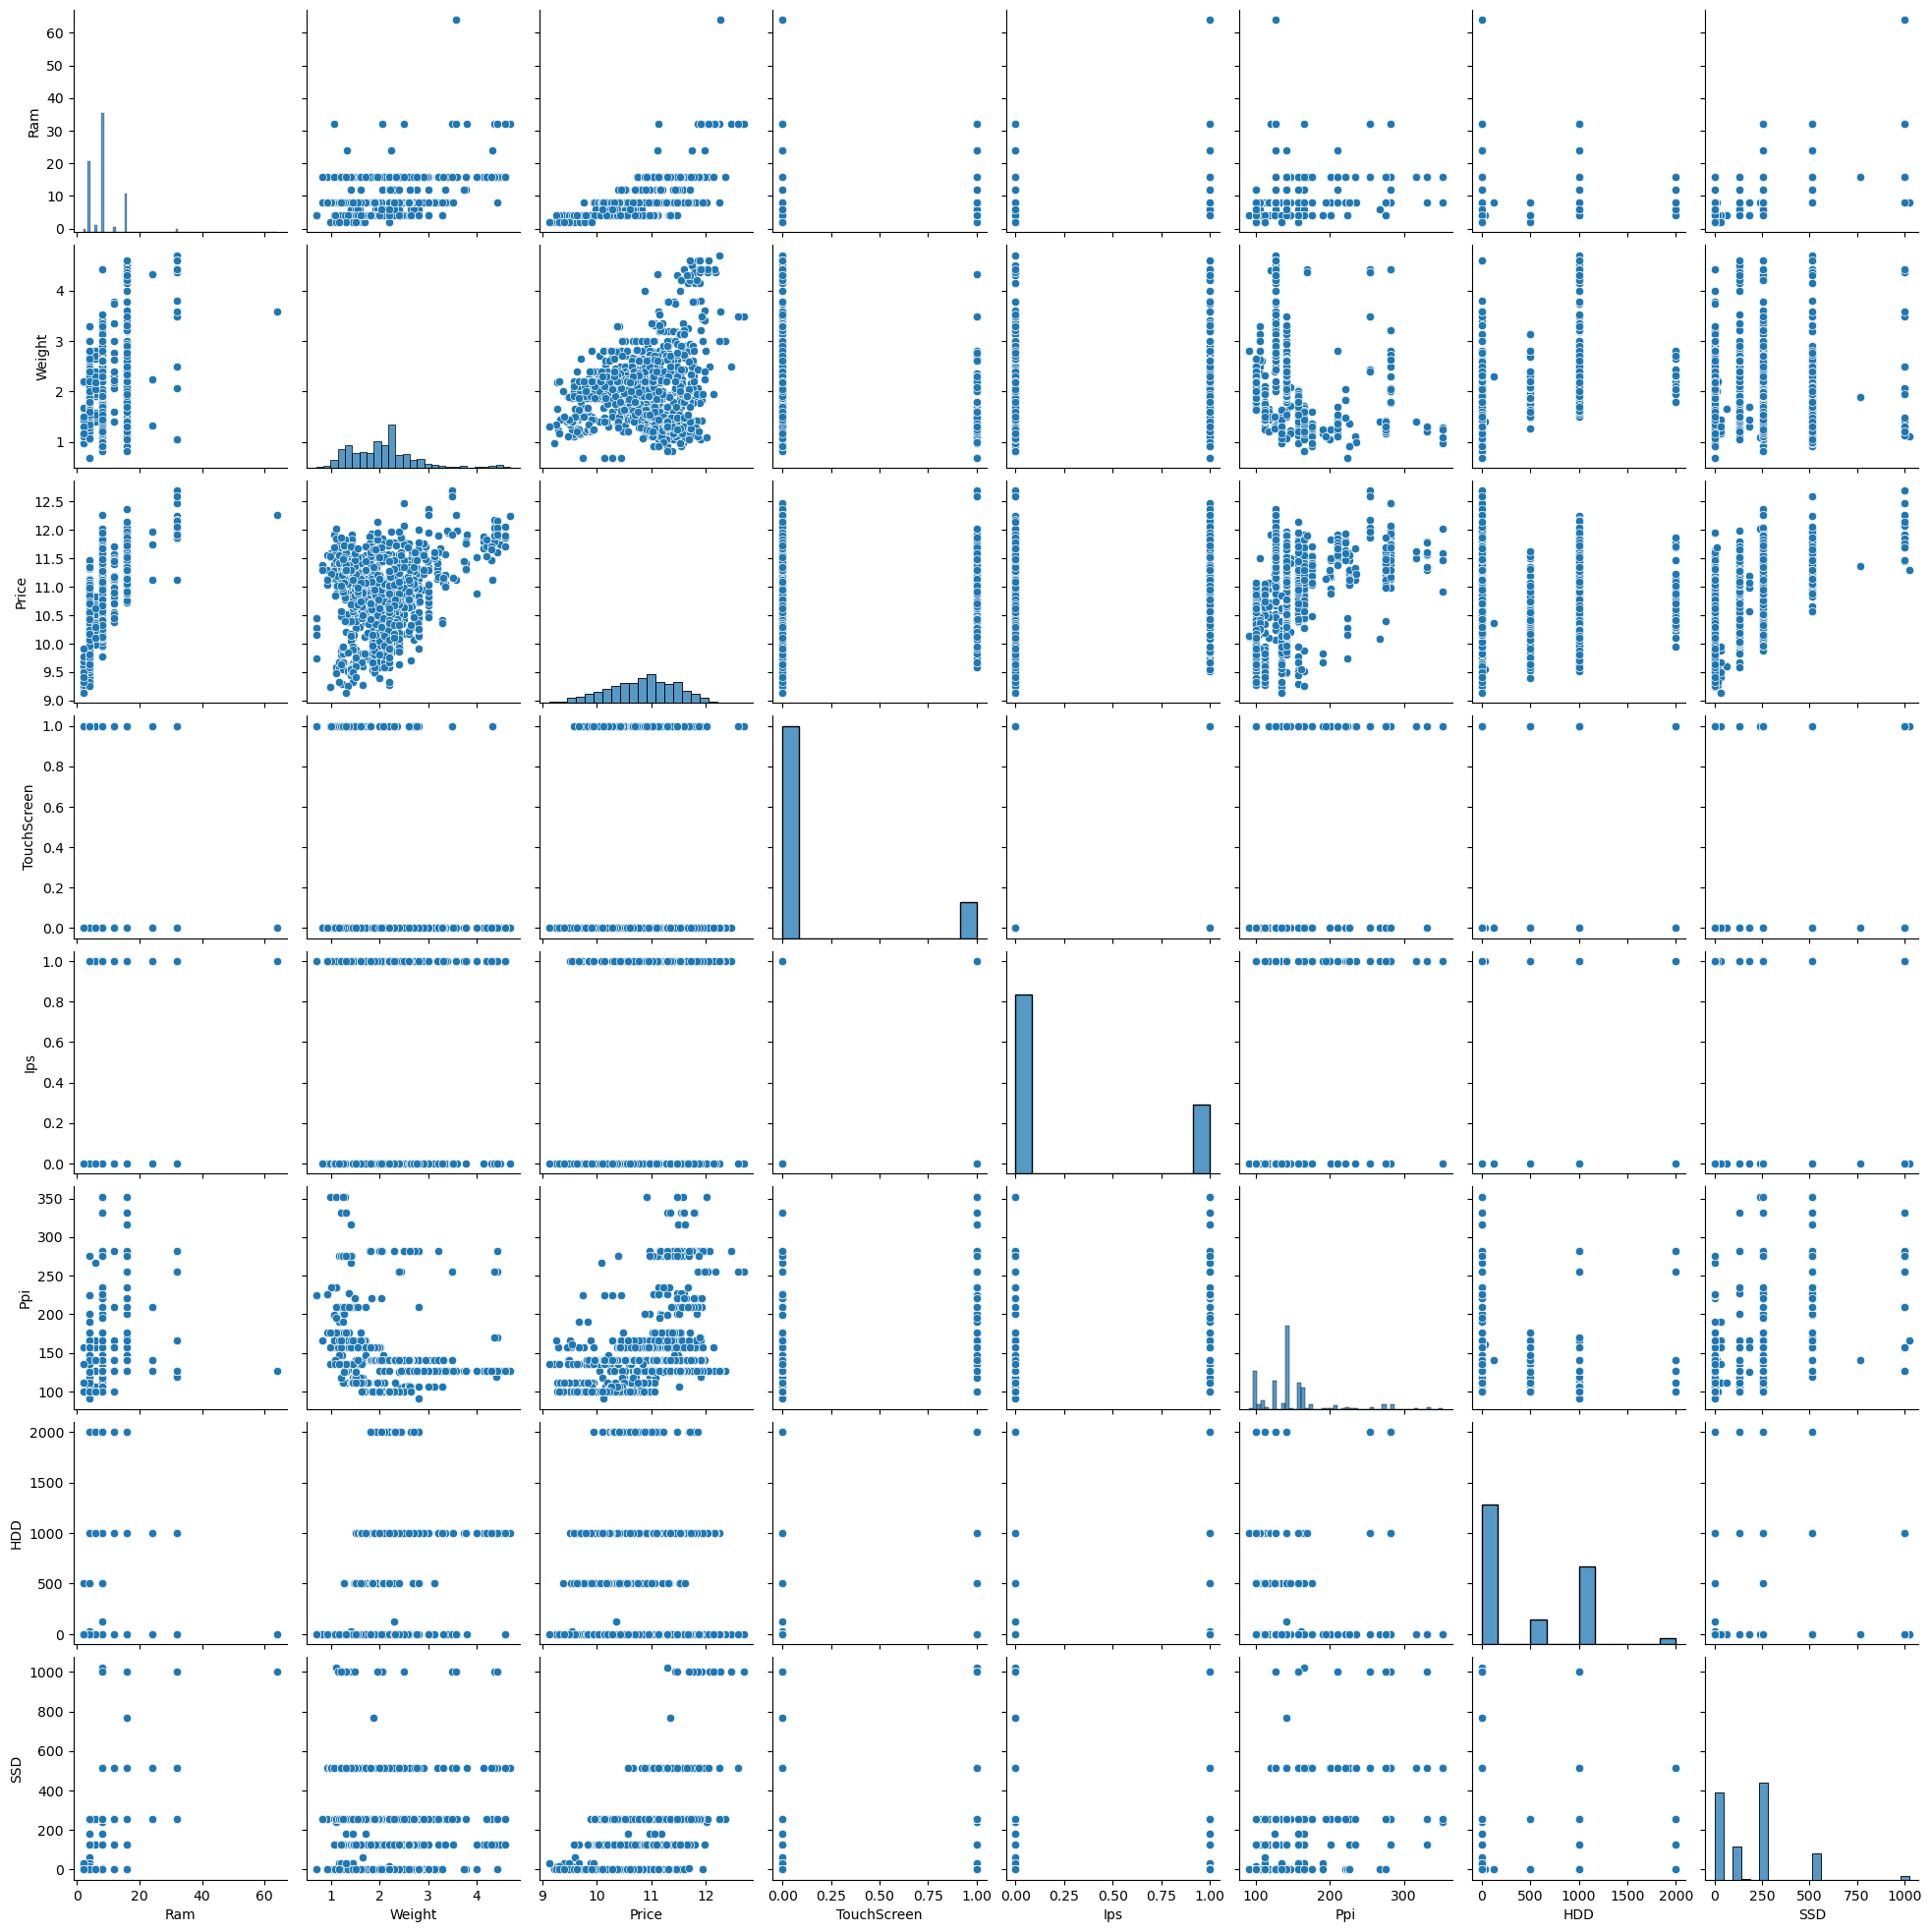

In [8]:
sns.pairplot(laptop)

In [ ]:
correlation_matrix = laptop.corr()
plt.figure(figsize=(10,10))
plt.title('Heat map of the correlation matrix')
plt.xlabel()
plt.ylabel()
plt.imshow(correlation_matrix, cmap='coolwarn', interpolation='nearset')
plt.colobar()
plt.show()

ValueError: could not convert string to float: 'Apple'

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Step 1: Load the Dataset
try:
    laptop = pd.read_csv('laptop_data_cleaned.csv')
    print("Data loaded successfully")
except Exception as e:
    print(f"Error loading data: {e}")

# Step 2: Split the Data into Training and Testing Sets
try:
    # Define features and target
    X = laptop.drop('Price', axis=1)
    y = laptop['Price']
    
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Combine X_train and y_train into a single DataFrame
    train_data = pd.concat([X_train, y_train], axis=1)
    
    # Combine X_test and y_test into a single DataFrame
    test_data = pd.concat([X_test, y_test], axis=1)
    
    print("Data split into training and testing sets successfully")
except Exception as e:
    print(f"Error splitting data: {e}")

# Step 3: Save the Split Data into Separate Files
try:
    train_data.to_csv('train_laptop_data_cleaned.csv', index=False)
    test_data.to_csv('test_laptop_data_cleaned.csv', index=False)
    print("Training and testing files saved successfully")
except Exception as e:
    print(f"Error saving files: {e}")


Data loaded successfully
Data split into training and testing sets successfully
Training and testing files saved successfully


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import pickle

# Step 1: Load the Dataset
try:
    laptop = pd.read_csv('laptop_data_cleaned.csv')
    print("Data loaded successfully")
except Exception as e:
    print(f"Error loading data: {e}")

# Step 2: Split the Data into Training and Testing Sets
try:
    # Define features and target
    X = laptop.drop('Price', axis=1)
    y = laptop['Price']
    
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print("Data split into training and testing sets successfully")
except Exception as e:
    print(f"Error splitting data: {e}")

# Step 3: Train the XGBoost Model
try:
    # Initialize and train the model
    model = XGBRegressor()
    model.fit(X_train, y_train)
    print("Model training completed")
except Exception as e:
    print(f"Error training the model: {e}")

# Step 4: Save the Trained Model
try:
    with open('model.pkl', 'wb') as f:
        pickle.dump(model, f)
    print("Trained model saved successfully")
except Exception as e:
    print(f"Error saving the model: {e}")


Data loaded successfully
Data split into training and testing sets successfully
Error training the model: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:Company: object, TypeName: object, Cpu_brand: object, Gpu_brand: object, Os: object
Trained model saved successfully


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import pickle

# Step 1: Load the Dataset
try:
    laptop = pd.read_csv('laptop_data_cleaned.csv')
    print("Data loaded successfully")
except Exception as e:
    print(f"Error loading data: {e}")

# Ensure the dataset is loaded
if 'laptop' in locals():
    # Step 2: Convert Categorical Features to One-Hot Encoding
    try:
        categorical_features = ['Company', 'TypeName', 'Cpu_brand', 'Gpu_brand', 'Os']
        laptop = pd.get_dummies(laptop, columns=categorical_features, drop_first=True)
        print("Categorical variables encoded successfully")
    except Exception as e:
        print(f"Error encoding categorical variables: {e}")

    # Step 3: Split the Data into Training and Testing Sets
    try:
        # Define features and target
        X = laptop.drop('Price', axis=1)
        y = laptop['Price']
        
        # Split the dataset into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        print("Data split into training and testing sets successfully")
    except Exception as e:
        print(f"Error splitting data: {e}")

    # Step 4: Train the XGBoost Model
    try:
        # Initialize and train the model
        model = XGBRegressor()
        model.fit(X_train, y_train)
        print("Model training completed")
    except Exception as e:
        print(f"Error training the model: {e}")

    # Step 5: Save the Trained Model
    try:
        with open('model.pkl', 'wb') as f:
            pickle.dump(model, f)
        print("Trained model saved successfully")
    except Exception as e:
        print(f"Error saving the model: {e}")


Data loaded successfully
Categorical variables encoded successfully
Data split into training and testing sets successfully
Model training completed
Trained model saved successfully


In [ ]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Step 1: Load the Dataset
laptop = pd.read_csv('laptop_data_cleaned.csv')

# Step 2: Convert Categorical Features to One-Hot Encoding
categorical_features = ['Company', 'TypeName', 'Cpu_brand', 'Gpu_brand', 'Os']
laptop = pd.get_dummies(laptop, columns=categorical_features, drop_first=True)

# Step 3: Split the Data into Training and Testing Sets
X = laptop.drop('Price', axis=1)
y = laptop['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Load the Trained Model
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

# Step 5: Make Predictions and Evaluate the Model
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")


Mean Absolute Error (MAE): 0.15984568495949616
Mean Squared Error (MSE): 0.045166435965341055
Root Mean Squared Error (RMSE): 0.21252396562585843
R-squared (R²): 0.8859789440666422
